In [254]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.optimize import curve_fit
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [255]:
def propagazione_cursori(Vdiv, measure):

    sigma = np.sqrt( (0.04 * Vdiv)**2 + (0.015 * measure)**2)

    return sigma

In [256]:
def lin(x, a, b):  
    return a + b * x

def esp(x, a, b, c):  
    return a + b * np.exp(- x * c**-1)

In [257]:
# OSC DATA
file_in =  '../../Data/PreAmp/calib_in_18.txt'
file_vdiv =  '../../Data/PreAmp/calib_in_vdiv_18.txt'

# ARDUINO DATA
file1 = '../../Data/PreAmp/calib_02_18_ROOT.dat'
file2 = '../../Data/PreAmp/calib_05_18_ROOT.dat'
file3 = '../../Data/PreAmp/calib_08_18_ROOT.dat'
file4 = '../../Data/PreAmp/calib_10_18_ROOT.dat'
file5 = '../../Data/PreAmp/calib_12_18_ROOT.dat'
file6 = '../../Data/PreAmp/calib_15_18_ROOT.dat'
file7 = '../../Data/PreAmp/calib_18_18_ROOT.dat'
file8 = '../../Data/PreAmp/calib_20_18_ROOT.dat'
file9 = '../../Data/PreAmp/calib_21_18_ROOT.dat'
file10 = '../../Data/PreAmp/calib_22_18_ROOT.dat'
file11 = '../../Data/PreAmp/calib_23_18_ROOT.dat'
file12 = '../../Data/PreAmp/calib_24_18_ROOT.dat'
file13 = '../../Data/PreAmp/calib_25_18_ROOT.dat'

# READ ARDUINO DATA
data1 = pd.read_csv(file1, sep = ' ', index_col = False, header = None)
data1.index = np.arange(1, len(data1)+1)
data1.columns = ['time', 'ADC']
data2 = pd.read_csv(file2, sep = ' ', index_col = False, header = None)
data2.index = np.arange(1, len(data2)+1)
data2.columns = ['time', 'ADC']
data3 = pd.read_csv(file3, sep = ' ', index_col = False, header = None)
data3.index = np.arange(1, len(data3)+1)
data3.columns = ['time', 'ADC']
data4 = pd.read_csv(file4, sep = ' ', index_col = False, header = None)
data4.index = np.arange(1, len(data4)+1)
data4.columns = ['time', 'ADC']
data5 = pd.read_csv(file5, sep = ' ', index_col = False, header = None)
data5.index = np.arange(1, len(data5)+1)
data5.columns = ['time', 'ADC']
data6 = pd.read_csv(file6, sep = ' ', index_col = False, header = None)
data6.index = np.arange(1, len(data6)+1)
data6.columns = ['time', 'ADC']
data7 = pd.read_csv(file7, sep = ' ', index_col = False, header = None)
data7.index = np.arange(1, len(data7)+1)
data7.columns = ['time', 'ADC']
data8 = pd.read_csv(file8, sep = ' ', index_col = False, header = None)
data8.index = np.arange(1, len(data8)+1)
data8.columns = ['time', 'ADC']
data9 = pd.read_csv(file9, sep = ' ', index_col = False, header = None)
data9.index = np.arange(1, len(data9)+1)
data9.columns = ['time', 'ADC']
data10 = pd.read_csv(file10, sep = ' ', index_col = False, header = None)
data10.index = np.arange(1, len(data10)+1)
data10.columns = ['time', 'ADC']
data11 = pd.read_csv(file11, sep = ' ', index_col = False, header = None)
data11.index = np.arange(1, len(data11)+1)
data11.columns = ['time', 'ADC']
data12 = pd.read_csv(file12, sep = ' ', index_col = False, header = None)
data12.index = np.arange(1, len(data12)+1)
data12.columns = ['time', 'ADC']
data13 = pd.read_csv(file13, sep = ' ', index_col = False, header = None)
data13.index = np.arange(1, len(data13)+1)
data13.columns = ['time', 'ADC']

# GET MAX VALUES
max1 = data1['ADC'].max()
max2 = data2['ADC'].max()
max3 = data3['ADC'].max()
max4 = data4['ADC'].max()
max5 = data5['ADC'].max()
max6 = data6['ADC'].max()
max7 = data7['ADC'].max()
max8 = data8['ADC'].max()
max9 = data9['ADC'].max()
max10 = data10['ADC'].max()
max11 = data11['ADC'].max()
max12 = data12['ADC'].max()
max13 = data13['ADC'].max()
max_values = np.array([max1, max2, max3, max4, max5, max6, max7, max8, max9, max10, max11, max12, max13])

# READ OSC DATA
Vin = np.loadtxt(file_in)
Vdiv = np.loadtxt(file_vdiv)

# MAKE DATAFRAME
data = pd.DataFrame({'max_values': list(max_values), 'Vin': list(Vin), 'Vdiv': list(Vdiv)}, columns = ['max_values', 'Vin', 'Vdiv'])

# ERROR PROPAGATION ON OSC DATA
data['err Vin'] = propagazione_cursori(data['Vdiv'], data['Vin'])

# SELECT RELEVANT DATAPOINTS
data = data.iloc[:,:]

# SHOW DATA
data

,max_values,Vin,Vdiv,err Vin
0,1019,0.206,0.050,0.003681
1,1383,0.512,0.100,0.008659
2,1765,0.824,0.200,0.014723
3,2019,1.020,0.200,0.017265
4,2289,1.230,0.200,0.020110
5,2680,1.540,0.304,0.026105
6,3080,1.860,0.304,0.030435
7,3355,2.040,0.352,0.033684
8,3500,2.150,0.352,0.035190
9,3636,2.260,0.376,0.037087


In [258]:
# PERFORM THE FIT
par, cov = curve_fit(f = lin, xdata = data['max_values'], ydata = data['Vin'], sigma = data['err Vin'], absolute_sigma = True)

# GET FIT PARAMETERS AND PARAMETER ERRORS
error = []
for i in range(len(par)):
    try:
        error.append(np.absolute(cov[i][i])**0.5)
    except:
        error.append( 0.00 )

fit_par = par
fit_err = np.array(error)

a_calib = fit_par[0]
b_calib = fit_par[1]
err_a_calib = fit_err[0]
err_b_calib = fit_err[1]

# PRINT CALIBRATION FUNCTION
print(
        'VOLT = ' +  ' (' + format(a_calib, '.3f') + ' +/- ' + format(err_a_calib, '.3f') + ') ' + ' + ' 
        + ' (' + format(b_calib, '.6f') + ' +/- ' + format(err_b_calib, '.6f') + ') ' + ' ADC'
    )

VOLT =  (-0.596 +/- 0.007)  +  (0.000791 +/- 0.000005)  ADC


In [259]:
3.3 / 4096

0.0008056640625

In [260]:
# ARDUINO WAVEFORM DATA
file_name = '../../Data/PreAmp/data_arduino.dat'

# READ DATA
data = pd.read_csv(file_name, index_col = False, header = None, sep = ' ')
data.index = np.arange(1, len(data)+1)

data.columns = ['t', 'ADC']

# CALIBRATION
# on time
data['time'] = data['t'] * 1e3 * 955000**-1
# on tension
data['V'] = a_calib + b_calib * data['ADC']

# ERROR PROPAGATION

NBIT = 12
ACC = 4
VREF = 3.3
CONV = 0.58

#data['errV'] = 3.3 * 4096**-1 * 3**-0.5 * 4
data['errV'] = ACC * VREF * CONV / 2**NBIT

# SHOW DATA
data

,t,ADC,time,V,errV
1,1,795,0.001047,0.032936,0.001869
2,2,793,0.002094,0.031354,0.001869
3,3,793,0.003141,0.031354,0.001869
4,4,798,0.004188,0.035311,0.001869
5,5,795,0.005236,0.032936,0.001869
...,...,...,...,...,...
2043,2043,793,2.139267,0.031354,0.001869
2044,2044,776,2.140314,0.017901,0.001869
2045,2045,787,2.141361,0.026606,0.001869
2046,2046,788,2.142408,0.027397,0.001869


In [261]:
data['mV'] = data['V'] * 1e3
data['errmV'] = data['errV'] * 1e3

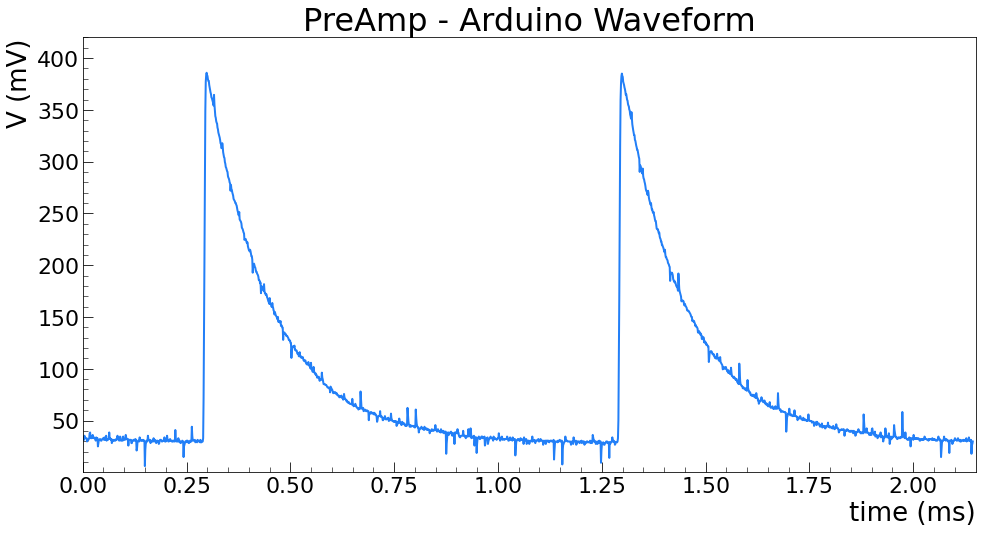

In [262]:
# FIG SETTINGS AND AXES
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1, 1, 1)

# PLOT DATA
ax1.plot(data['time'], data['mV'], color = '#227FF7', linewidth = 2, label = 'Data')
# ax1.plot(data['time'], data['V (V)'], color = '#227FF7', linewidth = 2, label = 'Data')

# PLOT TITLE
ax1.set_title('PreAmp - Arduino Waveform', fontsize = 32)

# AXIS LABELS
ax1.set_xlabel('time (ms)', fontsize = 26, loc = 'right')
ax1.set_ylabel('V (mV)', fontsize = 26, loc = 'top')

# AXIS TICKS
ax1.tick_params(axis = 'both', which = 'major', labelsize = 22, direction = 'in', length = 10)
ax1.tick_params(axis = 'both', which = 'minor', labelsize = 22, direction = 'in', length = 5)
ax1.set_xticks(ticks = ax1.get_xticks(), minor = True)
ax1.set_yticks(ticks = ax1.get_yticks(), minor = True)
ax1.minorticks_on()

# PLOT RANGE
ax1.set_xlim(left = 0, right = 2.15)
ax1.set_ylim(bottom = 0.01, top = 0.42  * 1e3)

#fig.savefig('../../Plots/PreAmp/preamp_waveform.png', dpi = 300, facecolor = 'white')

plt.show()

In [263]:
# SPLIT DATA INTO TWO DATAFRAMES
data1 = data.iloc[284:1231,:]
data2 = data.iloc[1239:,:]

In [264]:
# TRASLAZIONE A ZERO
data1['t'] = data1['t'] - 284
data2['t'] = data2['t'] - 1239

In [265]:
data1.reset_index(inplace = True)
data1.drop(labels = 'index', axis = 1, inplace=True)
data2.reset_index(inplace = True)
data2.drop(labels = 'index', axis = 1, inplace=True)

In [266]:
data1['time'] = data1['t'] * 1e3 * 955000**-1
data2['time'] = data2['t'] * 1e3 * 955000**-1

In [267]:
data1 = data1[data1['time'] < 0.8]
data2 = data2[data2['time'] < 0.8]

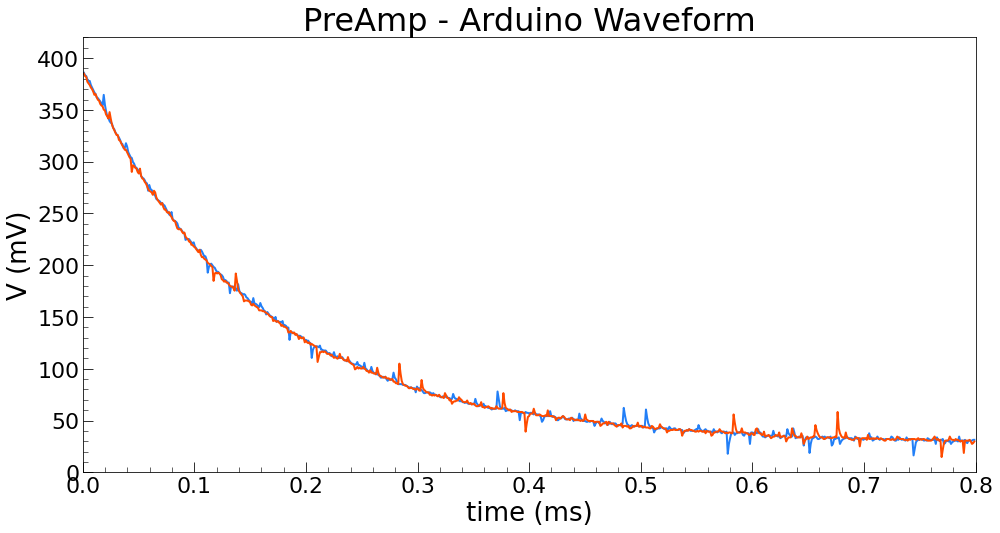

In [268]:
# FIG SETTINGS AND AXES
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1, 1, 1)

# PLOT DATA
ax1.plot(data1['time'], data1['mV'], color = '#227FF7', linewidth = 2, label = 'Data')
ax1.plot(data2['time'], data2['mV'], color = '#FF4B00', linewidth = 2, label = 'Data')
# ax1.plot(data['time'], data['V (V)'], color = '#227FF7', linewidth = 2, label = 'Data')

# PLOT TITLE
ax1.set_title('PreAmp - Arduino Waveform', fontsize = 32)

# AXIS LABELS
ax1.set_xlabel('time (ms)', fontsize = 26)
ax1.set_ylabel('V (mV)', fontsize = 26)

# AXIS TICKS
ax1.tick_params(axis = 'both', which = 'major', labelsize = 22, direction = 'in', length = 10)
ax1.tick_params(axis = 'both', which = 'minor', labelsize = 22, direction = 'in', length = 5)
ax1.set_xticks(ticks = ax1.get_xticks(), minor = True)
ax1.set_yticks(ticks = ax1.get_yticks(), minor = True)
ax1.minorticks_on()

# PLOT RANGE
ax1.set_xlim(left = 0, right = 0.8)
ax1.set_ylim(bottom = 0, top = 420)

plt.show()

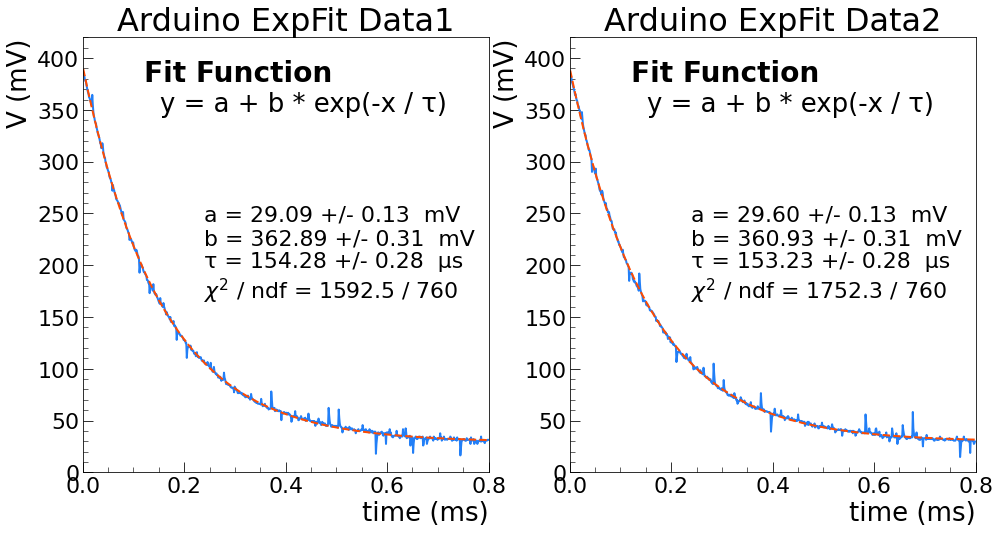

In [269]:
# FIG SETTINGS AND AXES
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# ----------------- DATA 1 
par, cov = curve_fit(f = esp, xdata = data1['time'], ydata = data1['mV'], maxfev=1000, 
                    p0 = [20, 360, 0.161], sigma = data1['errmV'], absolute_sigma = True)

func = esp(data1['time'], *par)

# COMPUTE RESIDUALS
res = data1['mV'] - func

# COMPUTE CHI2
chi2 = np.sum((res/data1['errmV'])**2)

#print(format(sigma_post, '.3f'))

# GET FIT PARAMETERS AND PARAMETER ERRORS
error = []
for i in range(len(par)):
    try:
        error.append(np.absolute(cov[i][i])**0.5)
    except:
        error.append( 0.00 )

fit_par = par
fit_err = np.array(error)

a = fit_par[0]
b = fit_par[1]
tau = fit_par[2]
a_err = fit_err[0]
b_err = fit_err[1]
tau_err = fit_err[2]


# ----------------- DATA 2 
par2, cov2 = curve_fit(f = esp, xdata = data2['time'], ydata = data2['mV'], maxfev=1000, 
                    p0 = [20, 360, 0.161], sigma = data2['errmV'], absolute_sigma = True)

func2 = esp(data2['time'], *par2)

# COMPUTE RESIDUALS
res2 = data2['mV'] - func2

# COMPUTE CHI2
chi22 = np.sum((res2/data2['errmV'])**2)

# GET FIT PARAMETERS AND PARAMETER ERRORS
error2 = []
for i in range(len(par2)):
    try:
        error2.append(np.absolute(cov2[i][i])**0.5)
    except:
        error2.append( 0.00 )

fit_par2 = par2
fit_err2 = np.array(error2)

a2 = fit_par2[0]
b2 = fit_par2[1]
tau2 = fit_par2[2]
a_err2 = fit_err2[0]
b_err2 = fit_err2[1]
tau_err2 = fit_err2[2]

# PLOT DATA
ax1.plot(data1['time'], data1['mV'], color = '#227FF7', linewidth = 2, label = 'Data')
ax1.plot(data1['time'], func, color = '#FF4B00', linewidth = 2, linestyle = 'dashed', label = 'Fit')

ax2.plot(data2['time'], data2['mV'], color = '#227FF7', linewidth = 2, label = 'Data')
ax2.plot(data2['time'], func2, color = '#FF4B00', linewidth = 2, linestyle = 'dashed', label = 'Fit')

aa = 'a = ' + format(a, '1.2f') + ' +/- ' + format(a_err, '1.2f') + '  mV'
bb = 'b = ' + format(b, '1.2f') + ' +/- ' + format(b_err, '1.2f') + '  mV'
cc = '\u03C4 = ' + format(tau * 1e3, '1.2f') + ' +/- ' + format(tau_err * 1e3, '1.2f') + '  \u03BCs'
chisq = '$\chi^{2}$ / ndf = ' + format(chi2, '1.1f') + ' / ' + format(len(data1['time'] ) - len(par), '1.0f') 


ax1.text(0.15, 0.90, 'Fit Function', fontsize = 28, fontweight = 'bold', transform=ax1.transAxes)
ax1.text(0.19, 0.83, 'y = a + b * exp(-x / \u03C4)', fontsize = 26, color = '#000000', transform = ax1.transAxes)
ax1.text(0.30, 0.4, aa + '\n' + bb + '\n' + cc + '\n' + chisq, fontsize = 22, color = '#000000', transform = ax1.transAxes)

aa2 = 'a = ' + format(a2, '1.2f') + ' +/- ' + format(a_err2, '1.2f') + '  mV'
bb2 = 'b = ' + format(b2, '1.2f') + ' +/- ' + format(b_err2, '1.2f') + '  mV'
cc2 = '\u03C4 = ' + format(tau2 * 1e3, '1.2f') + ' +/- ' + format(tau_err2 * 1e3, '1.2f') + '  \u03BCs'
chisq2 = '$\chi^{2}$ / ndf = ' + format(chi22, '1.1f') + ' / ' + format(len(data2['time'] ) - len(par2), '1.0f') 


ax2.text(0.15, 0.90, 'Fit Function', fontsize = 28, fontweight = 'bold', transform=ax2.transAxes)
ax2.text(0.19, 0.83, 'y = a + b * exp(-x / \u03C4)', fontsize = 26, color = '#000000', transform = ax2.transAxes)
ax2.text(0.30, 0.4, aa2 + '\n' + bb2 + '\n' + cc2 + '\n' + chisq2, fontsize = 22, color = '#000000', transform = ax2.transAxes)

# PLOT TITLE
ax1.set_title('Arduino ExpFit Data1', fontsize = 32)
ax2.set_title('Arduino ExpFit Data2', fontsize = 32)

# AXIS LABELS
ax1.set_xlabel('time (ms)', fontsize = 26, loc = 'right')
ax1.set_ylabel('V (mV)', fontsize = 26, loc = 'top')
ax2.set_xlabel('time (ms)', fontsize = 26, loc = 'right')
ax2.set_ylabel('V (mV)', fontsize = 26, loc = 'top')

# AXIS TICKS
ax1.tick_params(axis = 'both', which = 'major', labelsize = 22, direction = 'in', length = 10)
ax1.tick_params(axis = 'both', which = 'minor', labelsize = 22, direction = 'in', length = 5)
ax1.set_xticks(ticks = ax1.get_xticks(), minor = True)
ax1.set_yticks(ticks = ax1.get_yticks(), minor = True)
ax1.minorticks_on()
ax2.tick_params(axis = 'both', which = 'major', labelsize = 22, direction = 'in', length = 10)
ax2.tick_params(axis = 'both', which = 'minor', labelsize = 22, direction = 'in', length = 5)
ax2.set_xticks(ticks = ax1.get_xticks(), minor = True)
ax2.set_yticks(ticks = ax1.get_yticks(), minor = True)
ax2.minorticks_on()

# PLOT RANGE
ax1.set_xlim(left = 0, right = 0.8)
ax1.set_ylim(bottom = 0, top = 420)
ax2.set_xlim(left = 0, right = 0.8)
ax2.set_ylim(bottom = 0, top = 420)

plt.show()

In [270]:
lin_data1 = data1.copy()
lin_data2 = data2.copy()

In [271]:
lin_data1['normV'] = lin_data1['V'] - a * 1e-3
lin_data1['err'] = np.sqrt(lin_data1['errV']**2 + (a_err * 1e-3)**2)

lin_data1 = lin_data1[(lin_data1['normV'] > 0)]

lin_data1['logV'] = np.log(lin_data1['normV'])
lin_data1['err logV'] = lin_data1['err'] / lin_data1['normV']

lin_data1 = lin_data1[(lin_data1['err logV'] < 1)]
lin_data1 = lin_data1[(lin_data1['time'] < 0.5)]

lin_data1

,t,ADC,time,V,errV,mV,errmV,normV,err,logV,err logV
0,1,1241,0.001047,0.385881,0.001869,385.881325,1.869141,0.356791,0.001874,-1.030605,0.005251
1,2,1238,0.002094,0.383507,0.001869,383.507256,1.869141,0.354417,0.001874,-1.037281,0.005286
2,3,1237,0.003141,0.382716,0.001869,382.715900,1.869141,0.353626,0.001874,-1.039516,0.005298
3,4,1233,0.004188,0.379550,0.001869,379.550476,1.869141,0.350460,0.001874,-1.048508,0.005346
4,5,1231,0.005236,0.377968,0.001869,377.967763,1.869141,0.348878,0.001874,-1.053034,0.005370
...,...,...,...,...,...,...,...,...,...,...,...
472,473,810,0.495288,0.044807,0.001869,44.806822,1.869141,0.015717,0.001874,-4.153034,0.119207
473,474,810,0.496335,0.044807,0.001869,44.806822,1.869141,0.015717,0.001874,-4.153034,0.119207
474,475,810,0.497382,0.044807,0.001869,44.806822,1.869141,0.015717,0.001874,-4.153034,0.119207
475,476,810,0.498429,0.044807,0.001869,44.806822,1.869141,0.015717,0.001874,-4.153034,0.119207


In [272]:
lin_data2['normV'] = lin_data2['V'] - a2 * 1e-3
lin_data2['err'] = np.sqrt(lin_data2['errV']**2 + (a_err2 * 1e-3)**2)

lin_data2 = lin_data2[(lin_data2['normV'] > 0)]

lin_data2['logV'] = np.log(lin_data2['normV'])
lin_data2['err logV'] = lin_data2['err'] / lin_data2['normV']

lin_data2 = lin_data2[(lin_data2['err logV'] < 1)]
lin_data2 = lin_data2[(lin_data2['time'] < 0.5)]

lin_data2

,t,ADC,time,V,errV,mV,errmV,normV,err,logV,err logV
0,1,1240,0.001047,0.385090,0.001869,385.089969,1.869141,0.355485,0.001873,-1.034272,0.005270
1,2,1237,0.002094,0.382716,0.001869,382.715900,1.869141,0.353111,0.001873,-1.040973,0.005306
2,3,1236,0.003141,0.381925,0.001869,381.924544,1.869141,0.352320,0.001873,-1.043217,0.005318
3,4,1230,0.004188,0.377176,0.001869,377.176407,1.869141,0.347571,0.001873,-1.056785,0.005390
4,5,1228,0.005236,0.375594,0.001869,375.593695,1.869141,0.345989,0.001873,-1.061349,0.005415
...,...,...,...,...,...,...,...,...,...,...,...
472,473,810,0.495288,0.044807,0.001869,44.806822,1.869141,0.015202,0.001873,-4.186338,0.123240
473,474,810,0.496335,0.044807,0.001869,44.806822,1.869141,0.015202,0.001873,-4.186338,0.123240
474,475,814,0.497382,0.047972,0.001869,47.972247,1.869141,0.018367,0.001873,-3.997184,0.102001
475,476,809,0.498429,0.044015,0.001869,44.015466,1.869141,0.014411,0.001873,-4.239798,0.130008


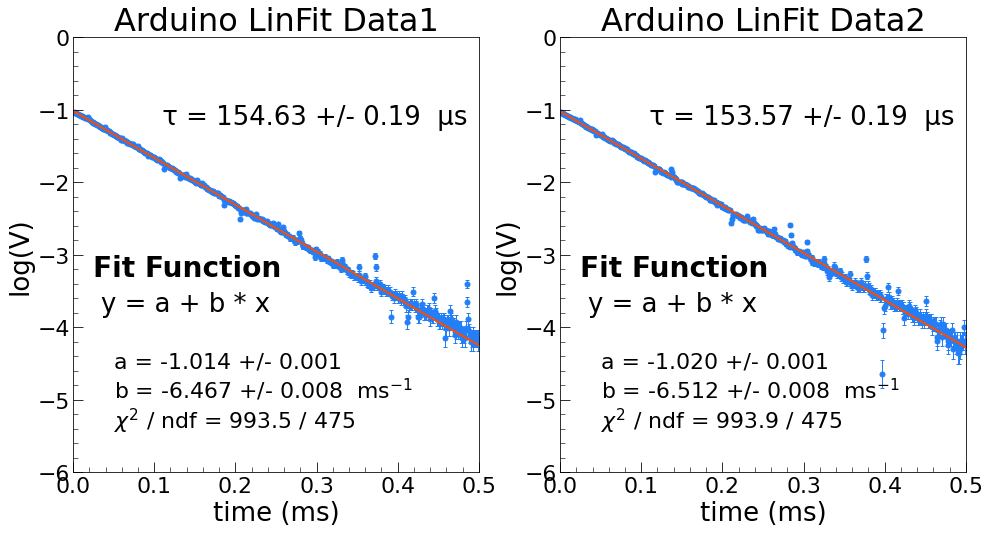

In [273]:
# FIG SETTINGS AND AXES
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# PERFORM THE FIT
par, cov = curve_fit(f = lin, xdata = lin_data1['time'], ydata = lin_data1['logV'], sigma = lin_data1['err logV'], absolute_sigma=True)

func = lin(lin_data1['time'], *par)

# COMPUTE RESIDUALS
res = lin_data1['logV'] - func

# COMPUTE CHI2
chi2 = np.sum((res/lin_data1['err logV'])**2)

# GET FIT PARAMETERS AND PARAMETER ERRORS
error = []
for i in range(len(par)):
    try:
        error.append(np.absolute(cov[i][i])**0.5)
    except:
        error.append( 0.00 )

fit_par = par
fit_err = np.array(error)

a = fit_par[0]
b = fit_par[1]
err_a = fit_err[0]
err_b = fit_err[1]


# PERFORM THE FIT
par2, cov2 = curve_fit(f = lin, xdata = lin_data2['time'], ydata = lin_data2['logV'], sigma = lin_data2['err logV'], absolute_sigma=True)

func2 = lin(lin_data2['time'], *par2)

# COMPUTE RESIDUALS
res2 = lin_data2['logV'] - func2

# COMPUTE CHI2
chi22 = np.sum((res2/lin_data2['err logV'])**2)

# GET FIT PARAMETERS AND PARAMETER ERRORS
error2 = []
for i in range(len(par2)):
    try:
        error2.append(np.absolute(cov2[i][i])**0.5)
    except:
        error2.append( 0.00 )

fit_par2 = par2
fit_err2 = np.array(error2)

a2 = fit_par2[0]
b2 = fit_par2[1]
err_a2 = fit_err2[0]
err_b2 = fit_err2[1]

# PLOT DATA
ax1.errorbar(lin_data1['time'], lin_data1['logV'], xerr = 0, yerr = lin_data1['err logV'], elinewidth=1, capsize=2, color = '#227FF7', linewidth = 0, marker = '.', markersize = 10, label = 'lin_data1', zorder = 1)
ax2.errorbar(lin_data2['time'], lin_data2['logV'], xerr = 0, yerr = lin_data2['err logV'], elinewidth=1, capsize=2, color = '#227FF7', linewidth = 0, marker = '.', markersize = 10, label = 'lin_data1', zorder = 1)

ax1.plot(lin_data1['time'], func, color = '#FF4B00', linewidth = 2, label = 'Fit', zorder = 2)
ax2.plot(lin_data2['time'], func2, color = '#FF4B00', linewidth = 2, label = 'Fit', zorder = 2)

# ax1.plot(lin_data1['time'], lin_data1['V (V)'], color = '#227FF7', linewidth = 2, label = 'Data')
# ax1.plot(final_data['time'], final_data['V (V)'], color = '#FF4B00', linewidth = 2, label = 'Data')

aa = 'a = ' + format(a, '1.3f') + ' +/- ' + format(err_a, '1.3f')
bb = 'b = ' + format(b, '1.3f') + ' +/- ' + format(err_b, '1.3f') + '  ms$^{-1}$'
tau = ' \u03C4 = ' + format(-b**-1 * 1e3, '1.2f') + ' +/- ' + format(err_b * b**-2 * 1e3, '1.2f') + '  \u03BCs'
chisq = '$\chi^{2}$ / ndf = ' + format(chi2, '1.1f') + ' / ' + format(len(lin_data1['time'] ) - len(par), '1.0f') 
ax1.text(0.05, 0.45, 'Fit Function', fontsize = 28, fontweight = 'bold', transform=ax1.transAxes)
ax1.text(0.07, 0.37, 'y = a + b * x', fontsize = 26, color = '#000000', transform = ax1.transAxes)
ax1.text(0.1, 0.1, aa + '\n' + bb + '\n' + chisq, fontsize = 22, color = '#000000', transform = ax1.transAxes)
ax1.text(0.2, 0.8, tau, fontsize = 26, color = '#000000', transform = ax1.transAxes)

aa2 = 'a = ' + format(a2, '1.3f') + ' +/- ' + format(err_a2, '1.3f')
bb2 = 'b = ' + format(b2, '1.3f') + ' +/- ' + format(err_b2, '1.3f') + '  ms$^{-1}$'
tau2 = ' \u03C4 = ' + format(-b2**-1 * 1e3, '1.2f') + ' +/- ' + format(err_b2 * b2**-2 * 1e3, '1.2f') + '  \u03BCs'
chisq2 = '$\chi^{2}$ / ndf = ' + format(chi22, '1.1f') + ' / ' + format(len(lin_data2['time'] ) - len(par2), '1.0f') 
ax2.text(0.05, 0.45, 'Fit Function', fontsize = 28, fontweight = 'bold', transform=ax2.transAxes)
ax2.text(0.07, 0.37, 'y = a + b * x', fontsize = 26, color = '#000000', transform = ax2.transAxes)
ax2.text(0.1, 0.1, aa2 + '\n' + bb2 + '\n' + chisq2, fontsize = 22, color = '#000000', transform = ax2.transAxes)
ax2.text(0.2, 0.8, tau2, fontsize = 26, color = '#000000', transform = ax2.transAxes)

# PLOT TITLE
ax1.set_title('Arduino LinFit Data1', fontsize = 32)
ax2.set_title('Arduino LinFit Data2', fontsize = 32)

# AXIS LABELS
ax1.set_xlabel('time (ms)', fontsize = 26)
ax1.set_ylabel('log(V)', fontsize = 26)
ax2.set_xlabel('time (ms)', fontsize = 26)
ax2.set_ylabel('log(V)', fontsize = 26)

# AXIS TICKS
ax1.tick_params(axis = 'both', which = 'major', labelsize = 22, direction = 'in', length = 10)
ax1.tick_params(axis = 'both', which = 'minor', labelsize = 22, direction = 'in', length = 5)
ax1.set_xticks(ticks = ax1.get_xticks(), minor = True)
ax1.set_yticks(ticks = ax1.get_yticks(), minor = True)
ax1.minorticks_on()
ax2.tick_params(axis = 'both', which = 'major', labelsize = 22, direction = 'in', length = 10)
ax2.tick_params(axis = 'both', which = 'minor', labelsize = 22, direction = 'in', length = 5)
ax2.set_xticks(ticks = ax1.get_xticks(), minor = True)
ax2.set_yticks(ticks = ax1.get_yticks(), minor = True)
ax2.minorticks_on()

# PLOT RANGE
ax1.set_xlim(left = 0, right = 0.5)
ax1.set_ylim(bottom = -6, top = 0)
ax2.set_xlim(left = 0, right = 0.5)
ax2.set_ylim(bottom = -6, top = 0)

plt.show()

In [274]:
V1 = data1['V']
V2 = data2['V']
V_12 = pd.concat((V1, V2))
V_12

V = V_12.groupby(V_12.index)
V_mean = V.mean()

err_V_mean = data1['errV']
#err_V_mean = data1['errV'] * 2**-0.5

final_data = pd.concat([data1['t'], data1['time'], V_mean, err_V_mean], axis=1)
final_data = final_data[(final_data['time'] < 0.8)]
final_data

,t,time,V,errV
0,1,0.001047,0.385486,0.001869
1,2,0.002094,0.383112,0.001869
2,3,0.003141,0.382320,0.001869
3,4,0.004188,0.378363,0.001869
4,5,0.005236,0.376781,0.001869
...,...,...,...,...
758,759,0.794764,0.030958,0.001869
759,760,0.795812,0.030167,0.001869
760,761,0.796859,0.028980,0.001869
761,762,0.797906,0.029771,0.001869


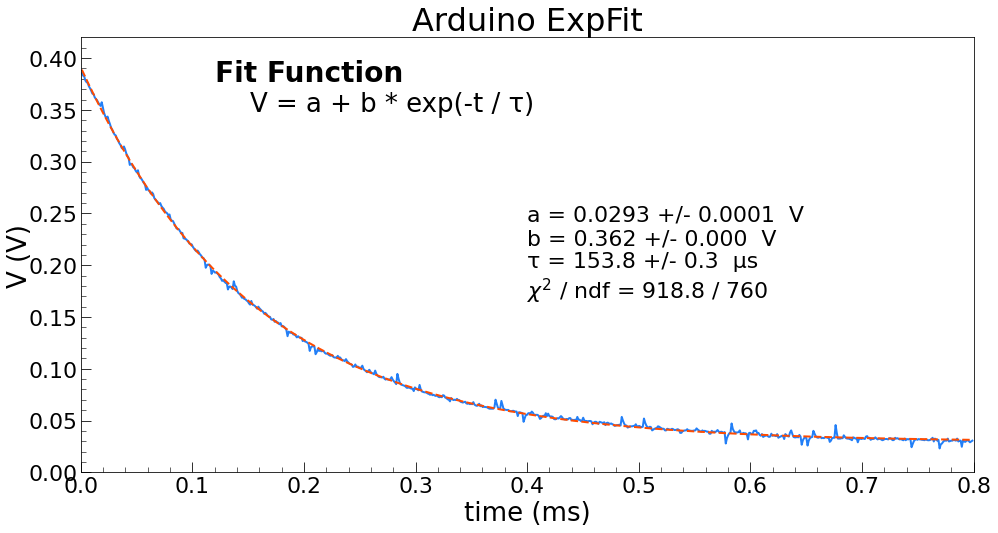

In [275]:
# FIG SETTINGS AND AXES
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1, 1, 1)

# FILTERED FIT
par, cov = curve_fit(f = esp, xdata = final_data['time'], ydata = final_data['V'], maxfev=1000, 
                    p0 = [0.02, 0.6, 0.151], sigma = final_data['errV'], absolute_sigma = True)

func = esp(final_data['time'], *par)

# COMPUTE RESIDUALS
res = final_data['V'] - func

# COMPUTE CHI2
chi2 = np.sum((res/final_data['errV'])**2)

# GET FIT PARAMETERS AND PARAMETER ERRORS
error = []
for i in range(len(par)):
    try:
        error.append(np.absolute(cov[i][i])**0.5)
    except:
        error.append( 0.00 )

fit_par = par
fit_err = np.array(error)

a = fit_par[0]
b = fit_par[1]
tau = fit_par[2]
a_err = fit_err[0]
b_err = fit_err[1]
tau_err = fit_err[2]

# PLOT DATA
ax1.plot(final_data['time'], final_data['V'], color = '#227FF7', linewidth = 2, label = 'Data')
#ax1.fill_between(final_data['time'], final_data['V (V)']-final_data['err V (V)'], final_data['V (V)']+final_data['err V (V)'], color = 'r')
ax1.plot(final_data['time'], func, color = '#FF4B00', linewidth = 2, linestyle = 'dashed', label = 'Fit')

aa = 'a = ' + format(a, '1.4f') + ' +/- ' + format(a_err, '1.4f') + '  V'
bb = 'b = ' + format(b, '1.3f') + ' +/- ' + format(b_err, '1.3f') + '  V'
cc = '\u03C4 = ' + format(tau * 1e3, '1.1f') + ' +/- ' + format(tau_err * 1e3, '1.1f') + '  \u03BCs'
chisq = '$\chi^{2}$ / ndf = ' + format(chi2, '1.1f') + ' / ' + format(len(final_data['time'] ) - len(par), '1.0f') 


ax1.text(0.15, 0.90, 'Fit Function', fontsize = 28, fontweight = 'bold', transform=ax1.transAxes)
ax1.text(0.19, 0.83, 'V = a + b * exp(-t / \u03C4)', fontsize = 26, color = '#000000', transform = ax1.transAxes)
ax1.text(0.5, 0.4, aa + '\n' + bb + '\n' + cc + '\n' + chisq, fontsize = 22, color = '#000000', transform = ax1.transAxes)

# PLOT TITLE
ax1.set_title('Arduino ExpFit', fontsize = 32)

# AXIS LABELS
ax1.set_xlabel('time (ms)', fontsize = 26)
ax1.set_ylabel('V (V)', fontsize = 26, labelpad = -5)

# AXIS TICKS
ax1.tick_params(axis = 'both', which = 'major', labelsize = 22, direction = 'in', length = 10)
ax1.tick_params(axis = 'both', which = 'minor', labelsize = 22, direction = 'in', length = 5)
ax1.set_xticks(ticks = ax1.get_xticks(), minor = True)
ax1.set_yticks(ticks = ax1.get_yticks(), minor = True)
ax1.minorticks_on()

# PLOT RANGE
ax1.set_xlim(left = 0, right = 0.8)
ax1.set_ylim(bottom = 0, top = 0.42)

plt.show()

In [276]:
lin_data = final_data.copy()

In [277]:
lin_data['normVa'] = lin_data['V'] - a
lin_data['err normVra'] = np.sqrt(lin_data['errV']**2 + a_err**2)

lin_data = lin_data[(lin_data['normVa'] > 0)]

lin_data['normV'] = lin_data['normVa'] / b
lin_data['err normVr'] = np.sqrt( ( lin_data['err normVra'] / b )**2 + ( lin_data['normVa'] * b_err / b**2 )**2)

lin_data['logV'] = np.log(lin_data['normV'])
lin_data['err logV'] = lin_data['err normVr'] / lin_data['normV']

lin_data = lin_data[(lin_data['err logV'] < 1)]
lin_data = lin_data[(lin_data['time'] < 0.5)]

lin_data

,t,time,V,errV,normVa,err normVra,normV,err normVr,logV,err logV
0,1,0.001047,0.385486,0.001869,0.356137,0.001874,0.984050,0.005245,-0.016079,0.005330
1,2,0.002094,0.383112,0.001869,0.353763,0.001874,0.977490,0.005244,-0.022767,0.005365
2,3,0.003141,0.382320,0.001869,0.352972,0.001874,0.975303,0.005244,-0.025007,0.005377
3,4,0.004188,0.378363,0.001869,0.349015,0.001874,0.964370,0.005243,-0.036280,0.005436
4,5,0.005236,0.376781,0.001869,0.347433,0.001874,0.959997,0.005242,-0.040825,0.005461
...,...,...,...,...,...,...,...,...,...,...
472,473,0.495288,0.044807,0.001869,0.015459,0.001874,0.042714,0.005177,-3.153230,0.121198
473,474,0.496335,0.044807,0.001869,0.015459,0.001874,0.042714,0.005177,-3.153230,0.121198
474,475,0.497382,0.046390,0.001869,0.017041,0.001874,0.047087,0.005177,-3.055755,0.109943
475,476,0.498429,0.044411,0.001869,0.015063,0.001874,0.041621,0.005177,-3.179160,0.124382


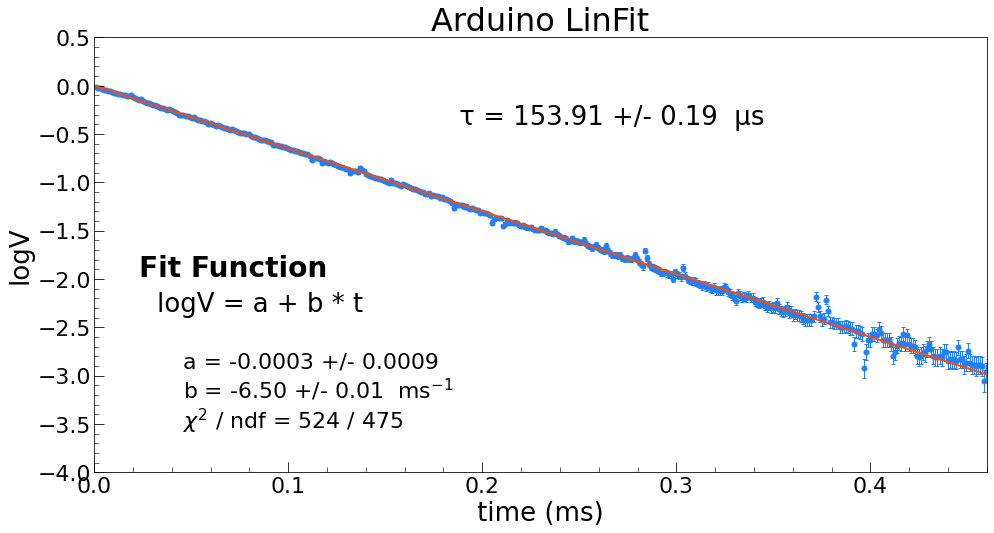

In [278]:
# FIG SETTINGS AND AXES
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1, 1, 1)

# PERFORM THE FIT
par, cov = curve_fit(f = lin, xdata = lin_data['time'], ydata = lin_data['logV'], sigma = lin_data['err logV'], absolute_sigma=True)

func = lin(lin_data['time'], *par)

# COMPUTE RESIDUALS
res = lin_data['logV'] - func

# COMPUTE CHI2
chi2 = np.sum((res/lin_data['err logV'])**2)

# GET FIT PARAMETERS AND PARAMETER ERRORS
error = []
for i in range(len(par)):
    try:
        error.append(np.absolute(cov[i][i])**0.5)
    except:
        error.append( 0.00 )

fit_par = par
fit_err = np.array(error)

a = fit_par[0]
b = fit_par[1]
err_a = fit_err[0]
err_b = fit_err[1]

# PLOT DATA
ax1.errorbar(lin_data['time'], lin_data['logV'], xerr = 0, yerr = lin_data['err logV'], elinewidth=1, capsize=2, color = '#227FF7', linewidth = 0, marker = '.', markersize = 10, label = 'lin_data', zorder = 1)

ax1.plot(lin_data['time'], func, color = '#FF4B00', linewidth = 2, label = 'Fit', zorder = 2, linestyle = 'solid')

# ax1.plot(lin_data['time (ms)'], lin_data['V (V)'], color = '#227FF7', linewidth = 2, label = 'Data')
# ax1.plot(final_data['time (ms)'], final_data['V (V)'], color = '#FF4B00', linewidth = 2, label = 'Data')

aa = 'a = ' + format(a, '1.4f') + ' +/- ' + format(err_a, '1.4f')
bb = 'b = ' + format(b, '1.2f') + ' +/- ' + format(err_b, '1.2f') + '  ms$^{-1}$'
tau = ' \u03C4 = ' + format(-b**-1 * 1e3, '1.2f') + ' +/- ' + format(err_b * b**-2 * 1e3, '1.2f') + '  \u03BCs'
chisq = '$\chi^{2}$ / ndf = ' + format(chi2, '1.0f') + ' / ' + format(len(lin_data['time'] ) - len(par), '1.0f') 

ax1.text(0.05, 0.45, 'Fit Function', fontsize = 28, fontweight = 'bold', transform=ax1.transAxes)
ax1.text(0.07, 0.37, 'logV = a + b * t', fontsize = 26, color = '#000000', transform = ax1.transAxes)
ax1.text(0.1, 0.1, aa + '\n' + bb + '\n' + chisq, fontsize = 22, color = '#000000', transform = ax1.transAxes)
ax1.text(0.4, 0.8, tau, fontsize = 26, color = '#000000', transform = ax1.transAxes)

# PLOT TITLE
ax1.set_title('Arduino LinFit', fontsize = 32)

# AXIS LABELS
ax1.set_xlabel('time (ms)', fontsize = 26)
ax1.set_ylabel('logV', fontsize = 26)

# AXIS TICKS
ax1.tick_params(axis = 'both', which = 'major', labelsize = 22, direction = 'in', length = 10)
ax1.tick_params(axis = 'both', which = 'minor', labelsize = 22, direction = 'in', length = 5)
ax1.set_xticks(ticks = ax1.get_xticks(), minor = True)
ax1.set_yticks(ticks = ax1.get_yticks(), minor = True)
ax1.minorticks_on()

# PLOT RANGE
ax1.set_xlim(left = 0, right = 0.46)
#ax1.set_ylim(bottom = -6, top = 0)

plt.show()

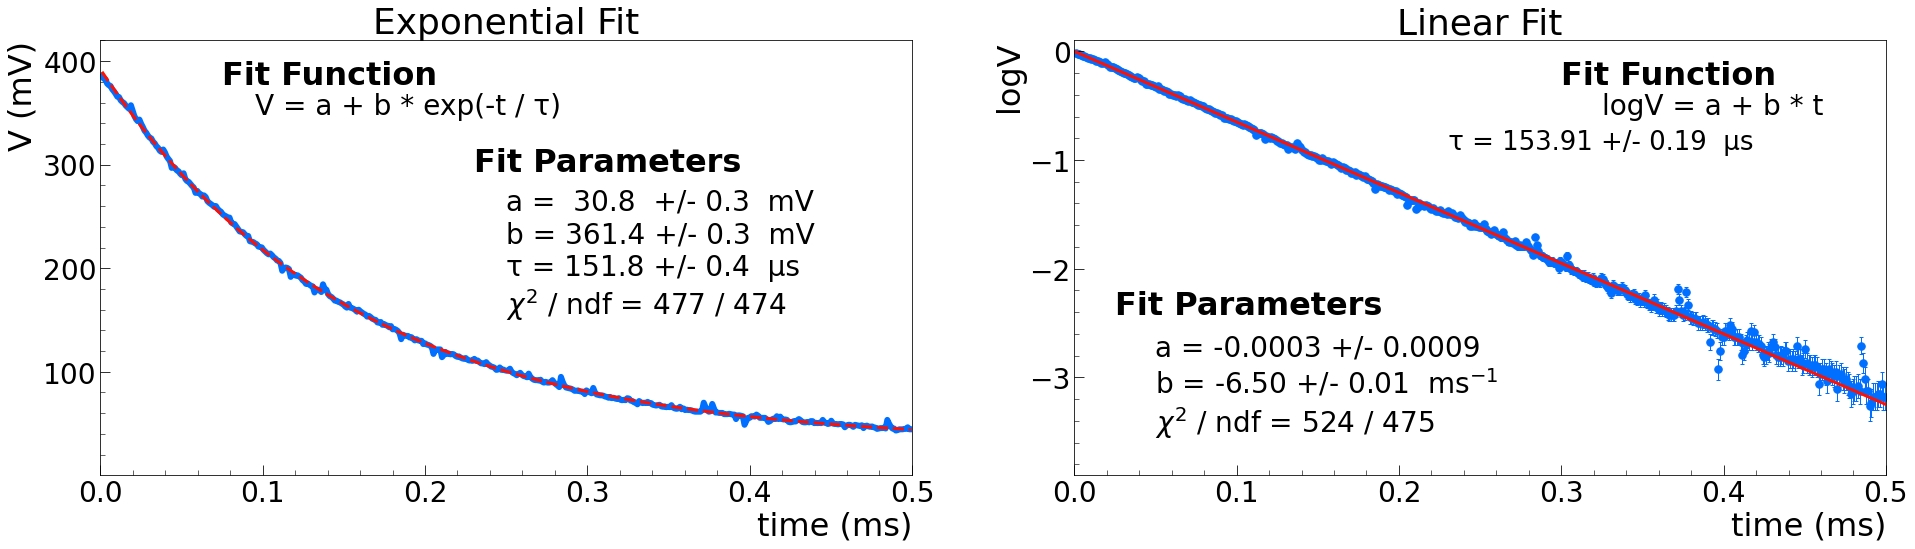

In [284]:
# FIG SETTINGS AND AXES
fig = plt.figure(figsize=(32,8))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

final_data = final_data[(final_data['time'] < 0.5)]
# EXP FIT
par_exp, cov_exp = curve_fit(f = esp, xdata = final_data['time'], ydata = final_data['V'], maxfev=1000, 
                    p0 = [30, 360, 0.161], sigma = final_data['errV'], absolute_sigma = True)

func_exp = esp(final_data['time'], *par_exp)

# COMPUTE RESIDUALS
res_exp = final_data['V'] - func_exp

# COMPUTE CHI2
chi2_exp = np.sum((res_exp/final_data['errV'])**2)

# GET FIT PARAMETERS AND PARAMETER ERRORS
error_exp = []
for i in range(len(par_exp)):
    try:
        error_exp.append(np.absolute(cov_exp[i][i])**0.5)
    except:
        error_exp.append( 0.00 )

fit_par_exp = par_exp
fit_err_exp = np.array(error_exp)

a_exp = fit_par_exp[0]
b_exp = fit_par_exp[1]
tau_exp = fit_par_exp[2]
a_err_exp = fit_err_exp[0]
b_err_exp = fit_err_exp[1]
tau_err_exp = fit_err_exp[2]

# PLOT DATA
ax1.plot(final_data['time'], final_data['V'] * 1e3, color = '#006FFF', linewidth = 6, label = 'Data')
ax1.plot(final_data['time'], func_exp * 1e3, color = '#ff1000', linewidth = 3, linestyle = 'dashed', label = 'Fit')

aa_exp = 'a =  ' + format(a_exp * 1e3, '1.1f') + '  +/- ' + format(a_err_exp * 1e3, '1.1f') + '  mV'
bb_exp = 'b = ' + format(b_exp * 1e3, '1.1f') + ' +/- ' + format(b_err_exp * 1e3, '1.1f') + '  mV'
cc_exp = '\u03C4 = ' + format(tau_exp * 1e3, '1.1f') + ' +/- ' + format(tau_err_exp * 1e3, '1.1f') + '  \u03BCs'
chisq_exp = '$\chi^{2}$ / ndf = ' + format(chi2_exp, '1.0f') + ' / ' + format(len(final_data['time'] ) - len(par_exp), '1.0f') 


ax1.text(0.15, 0.90, 'Fit Function', fontsize = 32, fontweight = 'bold', transform=ax1.transAxes)
ax1.text(0.19, 0.83, 'V = a + b * exp(-t / \u03C4)', fontsize = 28, color = '#000000', transform = ax1.transAxes)
ax1.text(0.46, 0.7, 'Fit Parameters', fontsize = 32, fontweight = 'bold', transform=ax1.transAxes)
ax1.text(0.5, 0.37, aa_exp + '\n' + bb_exp + '\n' + cc_exp + '\n' + chisq_exp, fontsize = 28, color = '#000000', transform = ax1.transAxes)

# PLOT TITLE
ax1.set_title('Exponential Fit', fontsize = 36)

# AXIS LABELS
ax1.set_xlabel('time (ms)', fontsize = 32, loc = 'right')
ax1.set_ylabel('V (mV)', fontsize = 32, labelpad = 5, loc = 'top')

# AXIS TICKS
ax1.tick_params(axis = 'both', which = 'major', labelsize = 28, direction = 'in', length = 10)
ax1.tick_params(axis = 'both', which = 'minor', labelsize = 28, direction = 'in', length = 5)
ax1.set_xticks(ticks = ax1.get_xticks(), minor = True)
ax1.set_yticks(ticks = ax1.get_yticks(), minor = True)
ax1.minorticks_on()

# PLOT RANGE
ax1.set_xlim(left = 0, right = 0.5)
ax1.set_ylim(bottom = 0.0001, top = 0.42 * 1e3)


# PERFORM THE LINEAR FIT
par_lin, cov_lin = curve_fit(f = lin, xdata = lin_data['time'], ydata = lin_data['logV'], sigma = lin_data['err logV'], absolute_sigma=True)

func_lin = lin(lin_data['time'], *par_lin)

# COMPUTE RESIDUALS
res_lin = lin_data['logV'] - func_lin

# COMPUTE CHI2
chi2_lin = np.sum((res_lin/lin_data['err logV'])**2)

# GET FIT PARAMETERS AND PARAMETER ERRORS
error_lin = []
for i in range(len(par_lin)):
    try:
        error_lin.append(np.absolute(cov_lin[i][i])**0.5)
    except:
        error_lin.append( 0.00 )

fit_par_lin = par_lin
fit_err_lin = np.array(error_lin)

a_lin = fit_par_lin[0]
b_lin = fit_par_lin[1]
err_a_lin = fit_err_lin[0]
err_b_lin= fit_err_lin[1]
tau_lin = -b_lin**-1
err_tau_lin = err_b_lin * b_lin**-2

# PLOT DATA
ax2.errorbar(lin_data['time'], lin_data['logV'], xerr = 0, yerr = lin_data['err logV'], elinewidth=1, capsize=2, color = '#006FFF', linewidth = 0, marker = '.', markersize = 15, label = 'lin_data', zorder = 1)

ax2.plot(lin_data['time'], func_lin, color = '#ff1000', linewidth = 3, label = 'Fit', zorder = 2, linestyle = 'solid')

# ax1.plot(lin_data['time'], lin_data['V'], color = '#227FF7', linewidth = 2, label = 'Data')
# ax1.plot(final_data['time'], final_data['V'], color = '#FF4B00', linewidth = 2, label = 'Data')

aa_lin = 'a = ' + format(a_lin, '1.4f') + ' +/- ' + format(err_a_lin, '1.4f')
bb_lin = 'b = ' + format(b_lin, '1.2f') + ' +/- ' + format(err_b_lin, '1.2f') + '  ms$^{-1}$'
tau_linn = ' \u03C4 = ' + format(tau_lin * 1e3, '1.2f') + ' +/- ' + format(err_tau_lin * 1e3, '1.2f') + '  \u03BCs'
chisq_lin = '$\chi^{2}$ / ndf = ' + format(chi2_lin, '1.0f') + ' / ' + format(len(lin_data['time'] ) - len(par_lin), '1.0f') 

ax2.text(0.6, 0.90, 'Fit Function', fontsize = 32, fontweight = 'bold', transform=ax2.transAxes)
ax2.text(0.65, 0.83, 'logV = a + b * t', fontsize = 28, color = '#000000', transform = ax2.transAxes)
ax2.text(0.05, 0.37, 'Fit Parameters', fontsize = 32, fontweight = 'bold', transform=ax2.transAxes)
ax2.text(0.1, 0.1, aa_lin + '\n' + bb_lin + '\n' + chisq_lin, fontsize = 28, color = '#000000', transform = ax2.transAxes)
ax2.text(0.45, 0.75, tau_linn, fontsize = 26, color = '#000000', transform = ax2.transAxes)

# PLOT TITLE
ax2.set_title('Linear Fit', fontsize = 36)

# AXIS LABELS
ax2.set_xlabel('time (ms)', fontsize = 32, loc = 'right')
ax2.set_ylabel('logV', fontsize = 32, loc = 'top')

# AXIS TICKS
ax2.tick_params(axis = 'both', which = 'major', labelsize = 28, direction = 'in', length = 10)
ax2.tick_params(axis = 'both', which = 'minor', labelsize = 28, direction = 'in', length = 5)
ax2.set_xticks(ticks = ax1.get_xticks(), minor = True)
ax2.set_yticks(ticks = ax1.get_yticks(), minor = True)
ax2.minorticks_on()

# PLOT RANGE
ax2.set_xlim(left = 0, right = 0.5)
ax2.set_ylim(bottom = -3.9, top = 0.1)

#fig.savefig('../../Plots/PreAmp/preamp_arduino_fit2.png', dpi = 300, facecolor = 'white')

plt.show()

In [280]:
def comp(x, y, errx, erry):
    l = np.abs(x-y)/np.sqrt(errx**2 + erry**2)
    return l

In [286]:
err_tau_lin

0.0001930419082847751

In [281]:
Rf = 696060
Cf = 0.000000000232
FS_Rf = 1000000 
FS_Cf = 0.000000001 
L_Rf = 0.07 / 100
L_Cf = 2.5 / 100
D_Rf = 8
D_Cf = 15
Res_Rf = 10
Res_Cf = 1e-12
sigma_L_Rf = 0.58 * L_Rf * Rf
sigma_L_Cf = 0.58 * L_Cf * Cf
sigma_D_Rf = 0.58 * D_Rf * Res_Rf
sigma_D_Cf = 0.58 * D_Cf * Res_Cf
sigma_Rf = np.sqrt(sigma_L_Rf**2 + sigma_D_Rf**2)
sigma_Cf = np.sqrt(sigma_L_Cf**2 + sigma_D_Cf**2)

tau_th = Rf * Cf * 1e3
sigma_tau_th = np.sqrt( (Cf * sigma_Rf)**2 + (Rf * sigma_Cf)**2 ) * 1e3

In [282]:
comp(tau_th, tau_lin, sigma_tau_th, err_tau_lin)

1.1655959237327127

In [283]:
comp(tau_th, tau_exp, sigma_tau_th, tau_err_exp)

1.4885365288667023

In [287]:
ft = (2*np.pi*tau_lin)**-1

In [288]:
err_ft = (2*np.pi)**-1 * err_tau_lin * tau_lin**-2

In [290]:
print(
    'ft = ' + format(ft, '.4f') + ' +/- ' + format(err_ft, '.4f') + '  kHz'
)

ft = 1.0340 +/- 0.0013  kHz


In [291]:
comp(ft, 1.03, err_ft, 0.03)

0.13482963927500702